In [1]:
import yaml
import torch
from data_generation import BucketSimulation
from lstm import deep_bucket_model
from model_controller import ModelController
from validation import ModelValidator
from vizualization import Visualization

In [2]:
# Load configuration
def load_config(config_path):
    with open(config_path, 'r') as file:
        config = yaml.safe_load(file)
    return config

config = load_config('configuration.yml')

In [3]:
# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() and config['device']['use_cuda'] else 'cpu')

In [4]:
# Initialize and generate synthetic data for each split
bucket_sim_train = BucketSimulation(config, 'train')
bucket_sim_val = BucketSimulation(config, 'val')
bucket_sim_test = BucketSimulation(config, 'test')

In [5]:
# Simulate and store data for training, validation, and testing
train_data = bucket_sim_train.generate_data(config['synthetic_data']['train']['num_records'])
val_data = bucket_sim_val.generate_data(config['synthetic_data']['val']['num_records'])
test_data = bucket_sim_test.generate_data(config['synthetic_data']['test']['num_records'])

In [6]:
bucket_dictionary = {
    'train': train_data,
    'val': val_data,
    'test': test_data
}

In [7]:
# Initialize the LSTM model and Model Controller
model_controller = ModelController(config, device, bucket_dictionary)

In [8]:
# Prepare data loaders
train_loader = model_controller.make_data_loader('train')
val_loader = model_controller.make_data_loader('val')
test_loader = model_controller.make_data_loader('test')

/home/jonat/deep_bucket_lab/src/model_controller.py:54: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /home/conda/feedstock_root/build_artifacts/libtorch_1711322746054/work/torch/csrc/utils/tensor_new.cpp:261.)
  ds = TensorDataset(torch.Tensor(np_seq_X), torch.Tensor(np_seq_y))


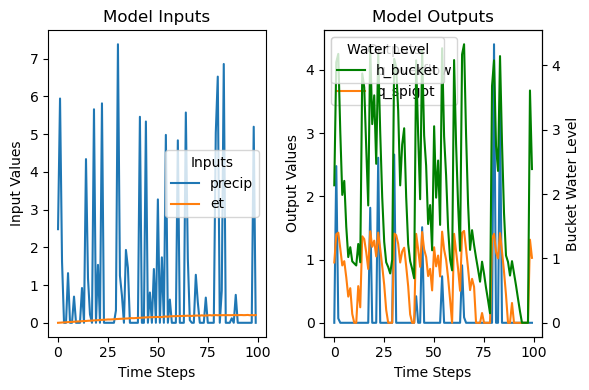

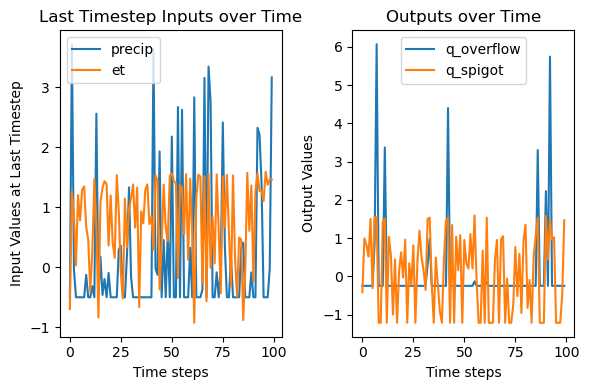

In [9]:
ibuc = 1
viz = Visualization(bucket_dictionary, config)
viz.viz_simulation("val", ibuc)
viz.viz_loader(val_loader[ibuc])

In [10]:
# Now train_loader, val_loader, and test_loader should be dictionaries
trained_model, results = model_controller.train_model(train_loader)

Epoch 1, Total Avg Loss: 1.3774198293685913
Epoch 2, Total Avg Loss: 0.9961467891931534
Epoch 3, Total Avg Loss: 0.9073330044746399
Epoch 4, Total Avg Loss: 0.9501916408538819
Epoch 5, Total Avg Loss: 0.9674347579479218


torch.Size([256, 2])
(256, 2)
torch.Size([42, 2])
(42, 2)
spigot_predictions 298
overflow_predictions.shape 298
spigot_out.shape (298,)
overflow_out.shape (298,)
Bucket ID: 0
Spigot NSE: -0.7618158883842936
Overflow NSE: -0.5542248496124205
Mass into the system: 258.8805802484785
Mass out or left over: 261.80140393296693
Percent mass residual: -1%


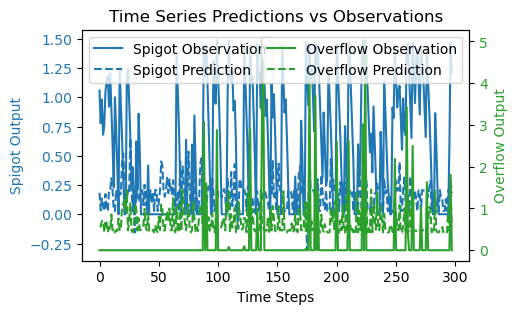

torch.Size([256, 2])
(256, 2)
torch.Size([42, 2])
(42, 2)
spigot_predictions 298
overflow_predictions.shape 298
spigot_out.shape (298,)
overflow_out.shape (298,)
Bucket ID: 1
Spigot NSE: -0.9069913778653522
Overflow NSE: -0.5717455594683762
Mass into the system: 278.8332834998027
Mass out or left over: 279.84191108986
Percent mass residual: -0%


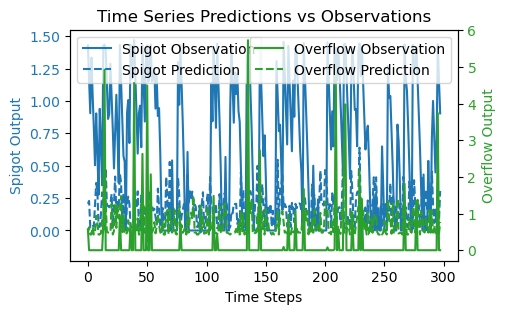

torch.Size([256, 2])
(256, 2)
torch.Size([42, 2])
(42, 2)
spigot_predictions 298
overflow_predictions.shape 298
spigot_out.shape (298,)
overflow_out.shape (298,)
Bucket ID: 2
Spigot NSE: -0.9761339510302047
Overflow NSE: -0.48762456552343836
Mass into the system: 281.7687078329958
Mass out or left over: 280.98851263309376
Percent mass residual: 0%


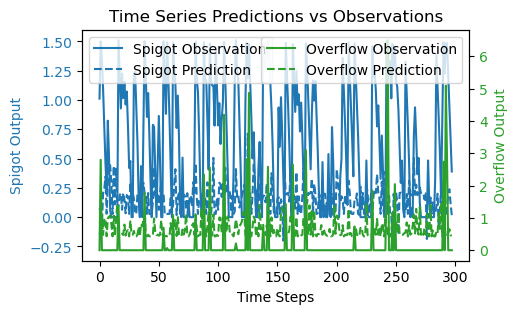

torch.Size([256, 2])
(256, 2)
torch.Size([42, 2])
(42, 2)
spigot_predictions 298
overflow_predictions.shape 298
spigot_out.shape (298,)
overflow_out.shape (298,)
Bucket ID: 3
Spigot NSE: -0.6222715727949668
Overflow NSE: -1.0195396179548295
Mass into the system: 227.36004742740252
Mass out or left over: 230.36000666423038
Percent mass residual: -1%


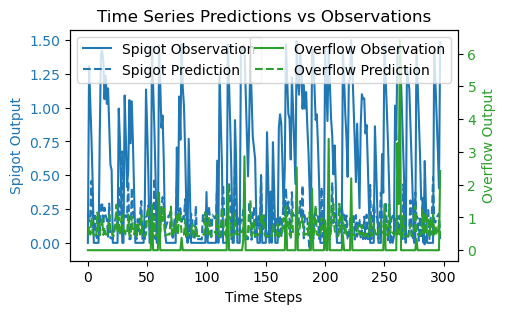

torch.Size([256, 2])
(256, 2)
torch.Size([42, 2])
(42, 2)
spigot_predictions 298
overflow_predictions.shape 298
spigot_out.shape (298,)
overflow_out.shape (298,)
Bucket ID: 4
Spigot NSE: -1.182160458086421
Overflow NSE: -0.5666900325323516
Mass into the system: 292.70626047655117
Mass out or left over: 295.05139145476596
Percent mass residual: -1%


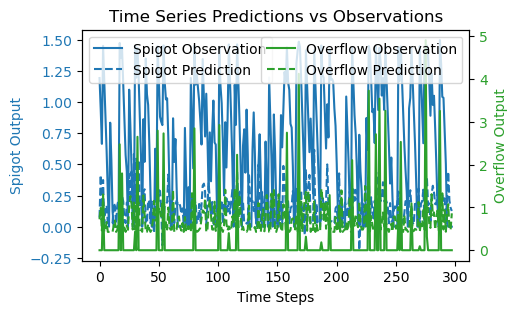

In [12]:
model_validator = ModelValidator(trained_model, device, 
                                 bucket_dictionary, train_loader, 
                                 config, "train", model_controller.scaler_out)
model_validator.validate_model(do_plot_timeseries=True)